<h1>Extracting and Visualizing Stock Data</h1>


## Webscraping to Extract Tesla Revenue Data


In [113]:
import requests
import private

html_data = requests.get(private.LINK).text

Parse the html data using `beautiful_soup`.


In [114]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data,'html.parser')


Extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`.


In [115]:
import pandas as pd

tesla_revenue = pd.read_html(html_data)[1]
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


Remove the comma and dollar sign from the `Revenue` column. 


In [116]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/var/folders/_s/_4ktyf8904n71s9jshmj85500000gn/T/ipykernel_8994/349343550.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



Remove an null or empty strings in the Revenue column.


In [117]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


## Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [118]:
html_data = requests.get(private.LINK_2).text

In [119]:
soup = BeautifulSoup(html_data,'html.parser')

Extract the table with `GameStop Quarterly Revenue` 

In [120]:
gme_revenue = pd.read_html(private.LINK_2)[1]
gme_revenue.columns = ['Date', 'Revenue']

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.head()

/var/folders/_s/_4ktyf8904n71s9jshmj85500000gn/T/ipykernel_8994/3716638863.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


## Plot Tesla Stock Graph


In [121]:
%matplotlib inline

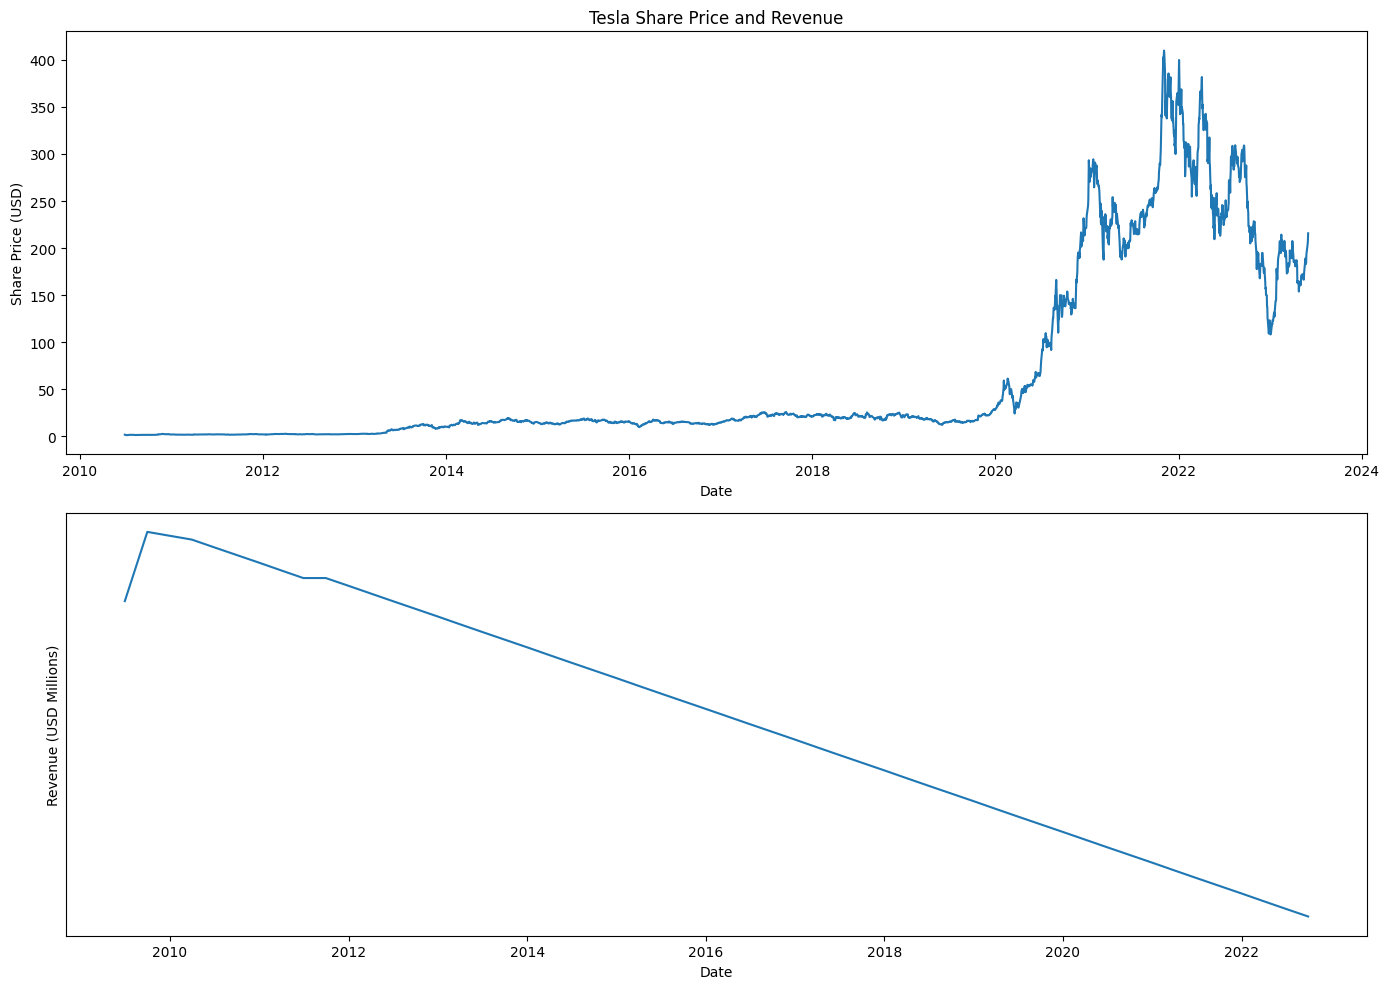

In [122]:
import yfinance
import matplotlib.pyplot as plt


data = yfinance.Ticker('TSLA')
tesla_data = data.history(start='2010-01-01')
tesla_data.reset_index(inplace=True)

# Create the first subplot for the share price
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(pd.to_datetime(tesla_data['Date'], infer_datetime_format=False), tesla_data['Close'])
plt.title('Tesla Share Price and Revenue')
plt.xlabel('Date')
plt.ylabel('Share Price (USD)')

# Create the second subplot for the revenue
plt.subplot(2, 1, 2)
plt.plot(pd.to_datetime(tesla_revenue['Date'], infer_datetime_format=False), tesla_revenue['Revenue'])
plt.xlabel('Date')
plt.ylabel('Revenue (USD Millions)')

# Add this line to remove y-axis labels
plt.yticks([])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


## Plot GameStop Stock Graph


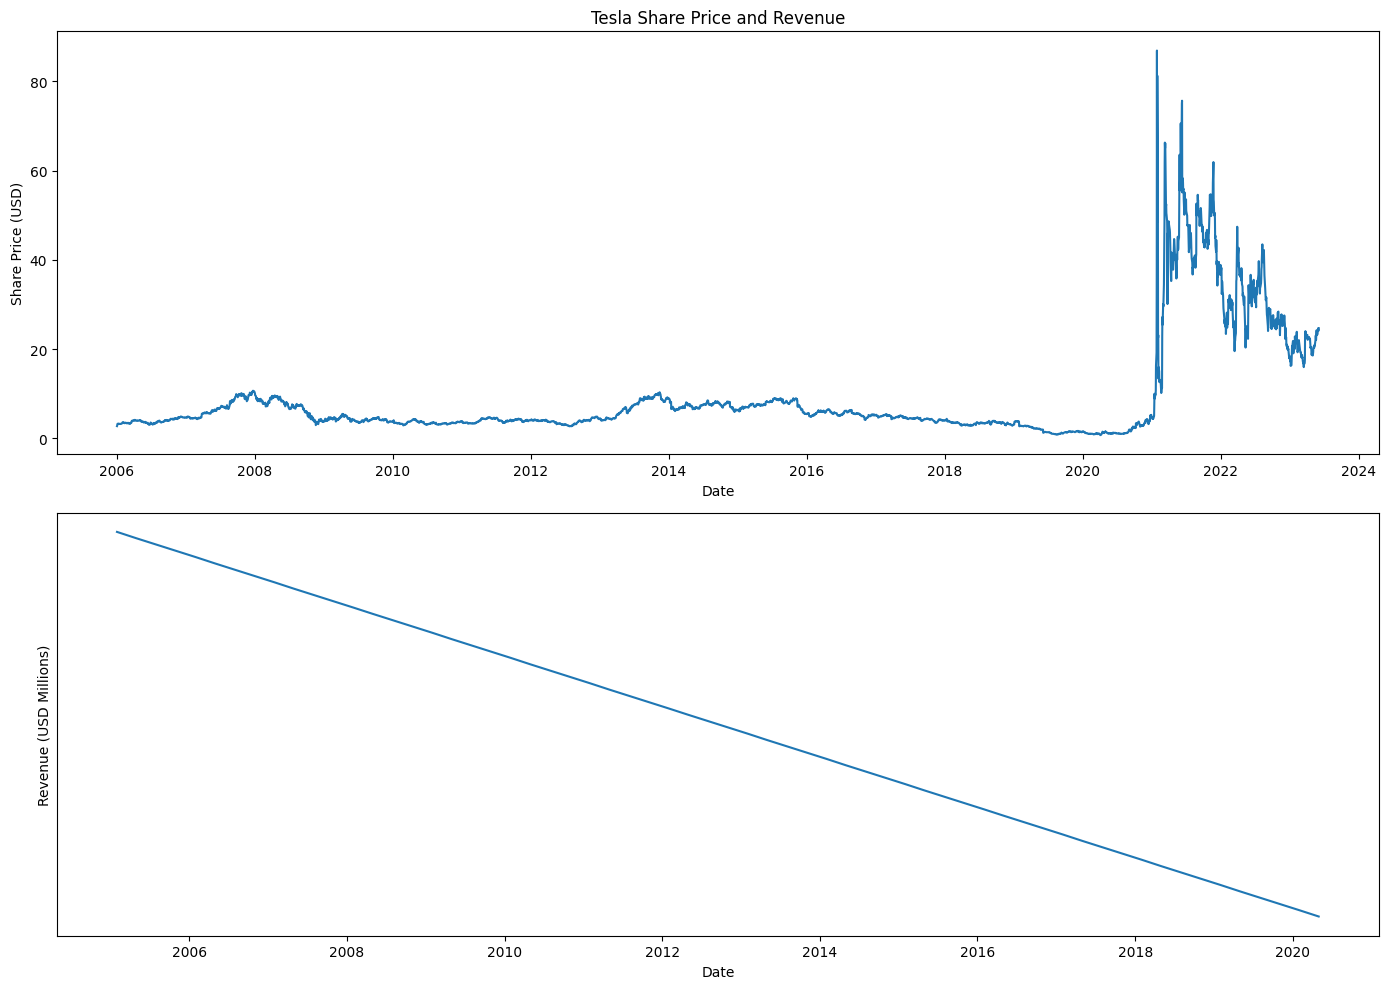

In [123]:
data = yfinance.Ticker('GME')
gme_data = data.history(start='2006-01-01')
gme_data.reset_index(inplace=True)

# Create the first subplot for the share price
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(pd.to_datetime(gme_data['Date'], infer_datetime_format=False), gme_data['Close'])
plt.title('Tesla Share Price and Revenue')
plt.xlabel('Date')
plt.ylabel('Share Price (USD)')

# Create the second subplot for the revenue
plt.subplot(2, 1, 2)
plt.plot(pd.to_datetime(gme_revenue['Date'], infer_datetime_format=False), gme_revenue['Revenue'])
plt.xlabel('Date')
plt.ylabel('Revenue (USD Millions)')

# Add this line to remove y-axis labels
plt.yticks([])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()
